In [1]:
import csv
import pandas as pd

def dataImport(path):
    data = pd.read_csv(path, encoding = "utf8", index_col=0, parse_dates=True)
    return(data)


In [2]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

# Importing Data

* The .csv fle is read into a dataframe called 'data_ABT'
* The 'Date' column is set as the index of the dataframe 

In [24]:
path_ABT='C:/Users/niharika/Desktop/data sciences/Springboard/Capstone 2/Stock/ABT.csv'
data_ABT= dataImport(path_ABT)
data_ABT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-07-28,0.638281,0.643542,0.633020,0.640034,0.286761,2309500
1980-07-29,0.645295,0.655816,0.645295,0.655816,0.293831,2224000
1980-07-30,0.661077,0.683872,0.661077,0.675105,0.302474,4875700
1980-07-31,0.675105,0.675105,0.663049,0.675105,0.302474,3328800
1980-08-01,0.675105,0.687379,0.673351,0.677077,0.303357,5339000


In [150]:
A=data_ABT[['High']]
A.head()

,High
Date,
1980-07-28,0.643542
1980-07-29,0.655816
1980-07-30,0.683872
1980-07-31,0.675105
1980-08-01,0.687379


# Visualizing the Stock Price Over Time 

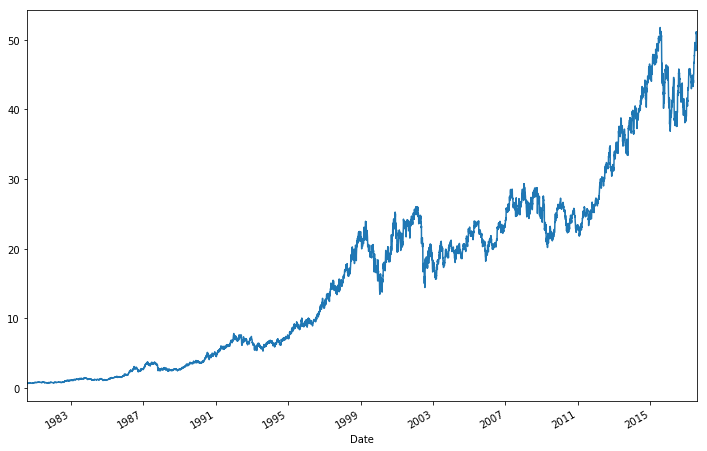

In [26]:
data_ABT['High'].plot(figsize=(12,8))

# Generate ACF Plots

* Generate ACF plots for different lags p = {1,2,3…} and list down the top 5 optimal lags in sorted order of decreasing ACF. (Autocorrelation function)

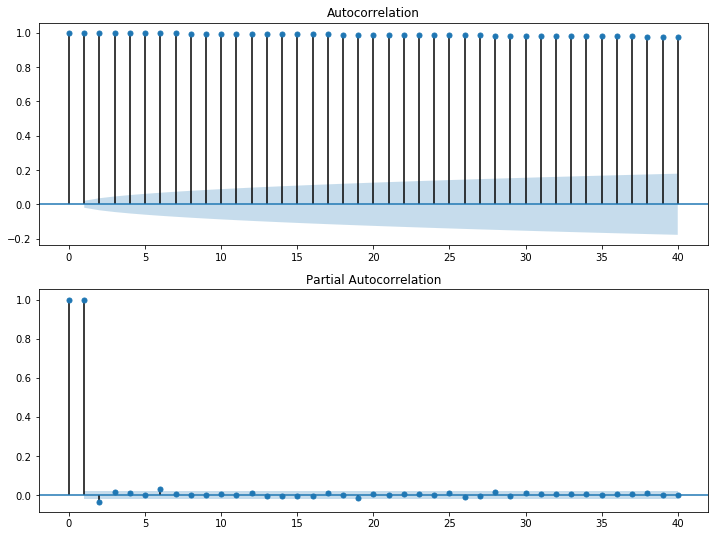

In [27]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_ABT['High'].values.squeeze(), lags=40, fft=True, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_ABT['High'], lags=40,ax=ax2)

From the above Autocorrelation Fuction Plot, we can deduce that p=1, p=2, p=3, p=4, p=5, q=1, q=2 are suitable lags

# Choice of ARMA Model: Conclusion

## Case1: p=1, q=1

In [48]:
modARMA11 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(1,0,1), enforce_stationarity=False)
resultsARMA11 = modARMA11.fit()
print(resultsARMA11.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -209.014
Date:                Tue, 01 Aug 2017   AIC                            424.028
Time:                        17:11:37   BIC                            445.343
Sample:                    07-28-1980   HQIC                           431.281
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0002   9.84e-05   1.02e+04      0.000       1.000       1.000
ma.L1          0.0979      0.005     19.022      0.000       0.088       0.108
sigma2         0.0613      0.000    198.226      0.0

In [58]:
# measure of autocorrelation in the residuals (below 2 indicates auttocorreltaion)
sm.stats.durbin_watson(resultsARMA11.resid.values) 

1.998700074415283

## Case2: p=2, q=1

In [49]:
modARMA21 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(2,0,1), enforce_stationarity=False)
resultsARMA21 = modARMA21.fit()
print(resultsARMA21.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -202.071
Date:                Tue, 01 Aug 2017   AIC                            412.142
Time:                        17:11:56   BIC                            440.562
Sample:                    07-28-1980   HQIC                           421.813
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7383      0.052     14.098      0.000       0.636       0.841
ar.L2          0.2619      0.052      5.000      0.000       0.159       0.365
ma.L1          0.3638      0.051      7.164      0.0

In [59]:
sm.stats.durbin_watson(resultsARMA21.resid.values)

2.0078181875310293

## Case3: p=3, q=1

In [50]:
modARMA31 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(3,0,1), enforce_stationarity=False)
resultsARMA31 = modARMA31.fit()
print(resultsARMA31.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -201.874
Date:                Tue, 01 Aug 2017   AIC                            413.747
Time:                        17:12:18   BIC                            449.272
Sample:                    07-28-1980   HQIC                           425.835
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7041      0.096      7.371      0.000       0.517       0.891
ar.L2          0.2838      0.106      2.676      0.007       0.076       0.492
ar.L3          0.0123      0.012      1.016      0.3

In [60]:
sm.stats.durbin_watson(resultsARMA31.resid.values)

1.9978146988158498

## Case4: p=4, q=1

In [51]:
modARMA41 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(4,0,1), enforce_stationarity=False)
resultsARMA41 = modARMA41.fit()
print(resultsARMA41.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -191.508
Date:                Tue, 01 Aug 2017   AIC                            395.016
Time:                        17:12:49   BIC                            437.646
Sample:                    07-28-1980   HQIC                           409.522
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6996      0.224      3.119      0.002       0.260       1.139
ar.L2          0.2734      0.246      1.110      0.267      -0.209       0.756
ar.L3         -0.0222      0.036     -0.619      0.5

In [61]:
sm.stats.durbin_watson(resultsARMA41.resid.values)

1.9990805671535699

## Case5: p=5, q=1

In [52]:
modARMA51 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(5,0,1), enforce_stationarity=False)
resultsARMA51 = modARMA51.fit()
print(resultsARMA51.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -191.644
Date:                Tue, 01 Aug 2017   AIC                            397.288
Time:                        17:13:12   BIC                            447.023
Sample:                    07-28-1980   HQIC                           414.211
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7003      2.777      0.252      0.801      -4.742       6.143
ar.L2          0.2730      3.046      0.090      0.929      -5.697       6.243
ar.L3         -0.0253      0.450     -0.056      0.9

In [62]:
sm.stats.durbin_watson(resultsARMA51.resid.values)

2.0002820573374063

## Case6: p=1, q=2

In [53]:
modARMA12 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(1,0,2), enforce_stationarity=False)
resultsARMA12 = modARMA12.fit()
print(resultsARMA12.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -196.853
Date:                Tue, 01 Aug 2017   AIC                            401.706
Time:                        17:13:25   BIC                            430.126
Sample:                    07-28-1980   HQIC                           411.377
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0002   9.36e-05   1.07e+04      0.000       1.000       1.000
ma.L1          0.0958      0.005     18.784      0.000       0.086       0.106
ma.L2         -0.0578      0.006     -9.425      0.0

In [63]:
sm.stats.durbin_watson(resultsARMA12.resid.values)

1.9986272452401763

## Case7: p=2, q=2

In [54]:
modARMA22 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(2,0,2), enforce_stationarity=False)
resultsARMA22 = modARMA22.fit()
print(resultsARMA22.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -188.516
Date:                Tue, 01 Aug 2017   AIC                            387.032
Time:                        17:13:41   BIC                            422.557
Sample:                    07-28-1980   HQIC                           399.121
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5640      0.063     25.010      0.000       1.441       1.687
ar.L2         -0.5639      0.063     -9.015      0.000      -0.687      -0.441
ma.L1         -0.4680      0.063     -7.480      0.0

In [64]:
sm.stats.durbin_watson(resultsARMA22.resid.values)

2.0009295768971489

## Case8: p=3, q=2

In [55]:
modARMA32 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(3,0,2), enforce_stationarity=False)
resultsARMA32 = modARMA32.fit()
print(resultsARMA32.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -188.623
Date:                Tue, 01 Aug 2017   AIC                            389.246
Time:                        17:13:56   BIC                            431.876
Sample:                    07-28-1980   HQIC                           403.752
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5381      0.067     22.932      0.000       1.407       1.670
ar.L2         -0.5751      0.085     -6.727      0.000      -0.743      -0.408
ar.L3          0.0370      0.050      0.735      0.4

In [65]:
sm.stats.durbin_watson(resultsARMA32.resid.values)

2.0007727991051838

## Case9: p=4, q=2

In [56]:
modARMA42 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(4,0,2), enforce_stationarity=False, enforce_invertibility=False)
resultsARMA42 = modARMA42.fit()
print(resultsARMA42.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -189.202
Date:                Tue, 01 Aug 2017   AIC                            392.404
Time:                        17:14:21   BIC                            442.139
Sample:                    07-28-1980   HQIC                           409.327
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2629      0.995      1.270      0.204      -0.687       3.212
ar.L2         -0.1225      1.579     -0.078      0.938      -3.217       2.972
ar.L3         -0.1779      0.698     -0.255      0.7

In [66]:
sm.stats.durbin_watson(resultsARMA42.resid.values)

1.9986186261577803

## Case10: p=5, q=2

In [70]:
modARMA52 = sm.tsa.statespace.SARIMAX(A[:9000], trend='n', order=(5,0,2), enforce_stationarity=False, enforce_invertibility=False)
resultsARMA52 = modARMA52.fit()
print(resultsARMA52.summary())

                           Statespace Model Results                           
Dep. Variable:                   High   No. Observations:                 9000
Model:               SARIMAX(5, 0, 2)   Log Likelihood                -363.156
Date:                Tue, 01 Aug 2017   AIC                            742.313
Time:                        17:33:01   BIC                            799.153
Sample:                    07-28-1980   HQIC                           761.654
                         - 04-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0967      0.005    205.908      0.000       1.086       1.107
ar.L2          0.8397      0.009     98.701      0.000       0.823       0.856
ar.L3         -1.0593      0.008   -140.385      0.0

In [71]:
sm.stats.durbin_watson(resultsARMA52.resid.values)

2.0275431765112719

# Conclusion

The output of our code suggests that SARIMAX(2, 0, 2) yields the lowest AIC value of 387.032. We should therefore consider this to be optimal option out of all the ARMA models we have considered.

# Choice of ARIMA Model: 



In [123]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # An augmented Dickey–Fuller test (ADF) tests the null hypothesis 
    # that a unit root is present in a time series sample. 
    # The alternative hypothesis is stationarity or trend-stationarity.
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

There are various transformations you can do to stationarize the data.

1. Deflation by CPI
1. Logarithmic
1. First Difference
1. Seasonal Difference
1. Seasonal Adjustment

## ARIMA: First Difference

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


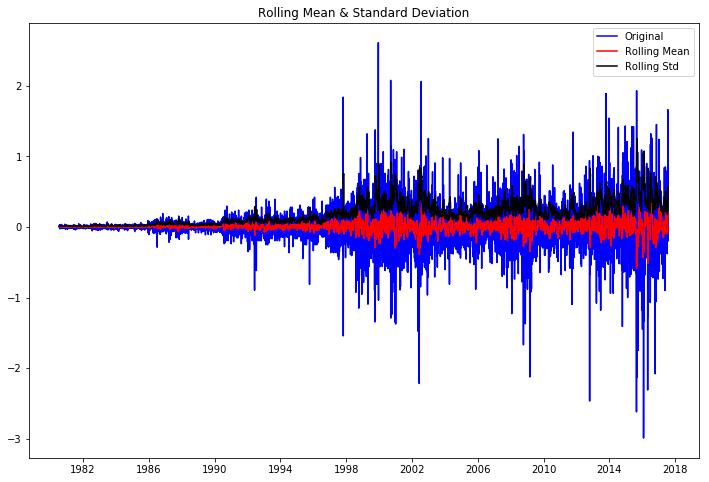

Results of Dickey-Fuller Test:
Test Statistic                -1.591576e+01
p-value                        8.028127e-29
#Lags Used                     3.700000e+01
Number of Observations Used    9.292000e+03
Critical Value (1%)           -3.431054e+00
Critical Value (5%)           -2.861851e+00
Critical Value (10%)          -2.566936e+00
dtype: float64


In [151]:
A['first_difference'] = A.High - A.High.shift(1)  
test_stationarity(A.first_difference.dropna(inplace=False))

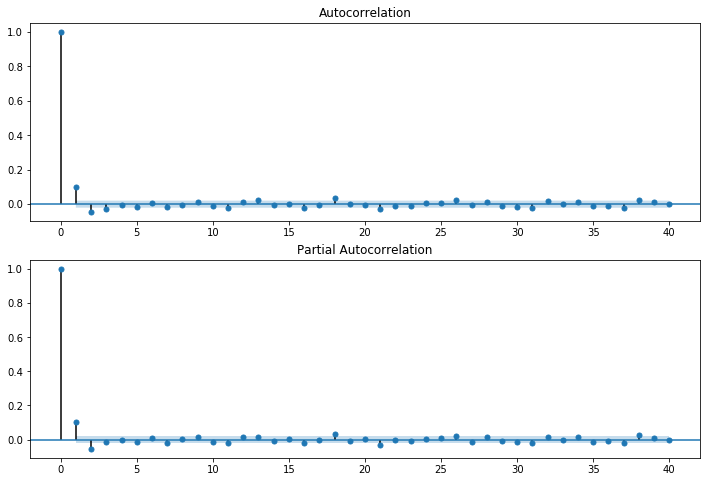

In [147]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(A['first_difference'].iloc[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(A['first_difference'].iloc[1:], lags=40, ax=ax2)

From the above Autocorrelation Fuction Plot, we can deduce that p=0, p=1, p=18, q=0, q=1 are suitable lags.

### Case1: p=0, q=0

In [152]:
#seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model
modARIMA00 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12),
                                enforce_invertibility=False)
resultsARIMA00 = modARIMA00.fit()
print(resultsARIMA00.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   first_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3362.393
Date:                            Tue, 01 Aug 2017   AIC                           6730.787
Time:                                    22:43:49   BIC                           6752.210
Sample:                                07-28-1980   HQIC                          6738.063
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0145      0.007      2.201      0.028       0.002       0.027
ma.S.L12      -1.0000      0.615   

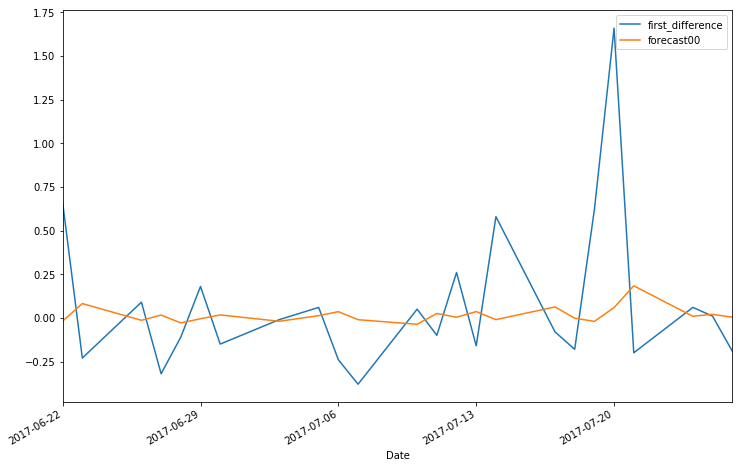

In [167]:
# We produce one-step ahead forecasts, meaning that forecasts at each point are 
# generated using the full history up to that point.

A['forecast00'] = resultsARIMA00.predict() 
A[['first_difference', 'forecast00']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

### Case2: p=1, q=0

In [170]:
modARIMA10 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(1,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
resultsARIMA10 = modARIMA10.fit()
print(resultsARIMA10.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   first_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -2462.892
Date:                            Wed, 02 Aug 2017   AIC                           4931.784
Time:                                    09:35:23   BIC                           4953.208
Sample:                                07-28-1980   HQIC                          4939.061
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4192      0.004    -94.535      0.000      -0.428      -0.411
ma.S.L12      -0.9997      0.008   

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


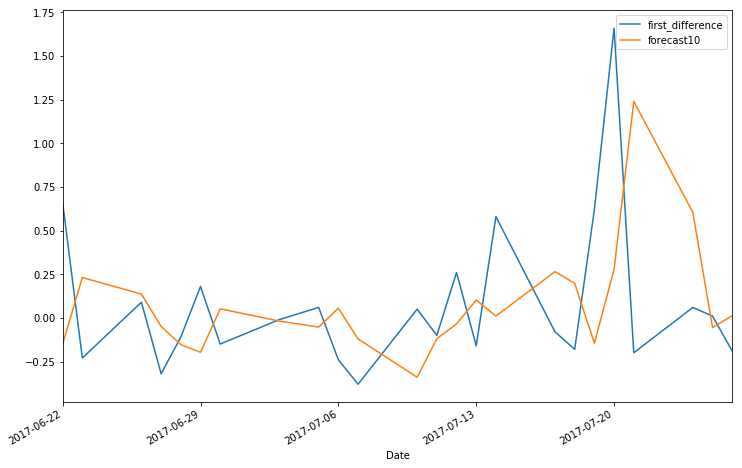

In [155]:
A['forecast10'] = resultsARIMA10.predict() 
A[['first_difference', 'forecast10']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

### Case3: p=18, q=0

In [156]:
modARIMA180 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(18,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
resultsARIMA180 = modARIMA180.fit()
print(resultsARIMA180.summary())

                                  Statespace Model Results                                 
Dep. Variable:                    first_difference   No. Observations:                 9331
Model:             SARIMAX(18, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -793.625
Date:                             Tue, 01 Aug 2017   AIC                           1627.251
Time:                                     22:56:43   BIC                           1770.073
Sample:                                 07-28-1980   HQIC                          1675.762
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8405      0.005   -154.970      0.000      -0.851      -0.830
ar.L2         -0.8435      

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


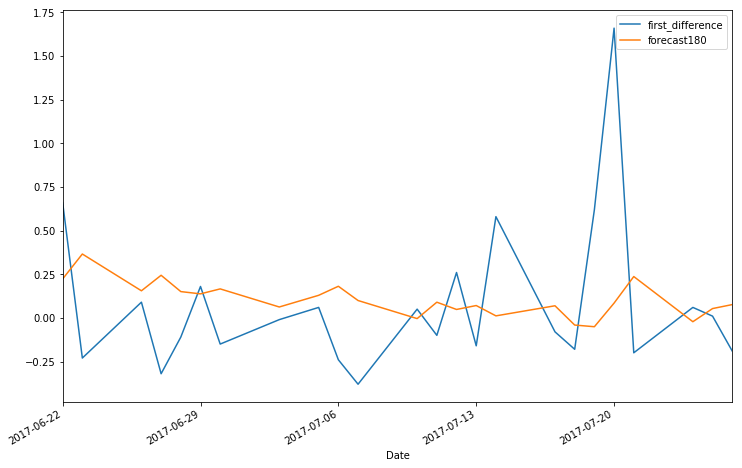

In [158]:
A['forecast180'] = resultsARIMA180.predict() 
A[['first_difference', 'forecast180']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

### Case4: p=0, q=1

In [162]:
modARIMA01 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
resultsARIMA01 = modARIMA01.fit()
print(resultsARIMA01.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   first_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -644.978
Date:                            Tue, 01 Aug 2017   AIC                           1295.957
Time:                                    23:03:08   BIC                           1317.380
Sample:                                07-28-1980   HQIC                          1303.234
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.056    -17.885      0.000      -1.110      -0.890
ma.S.L12      -1.0001      0.023   

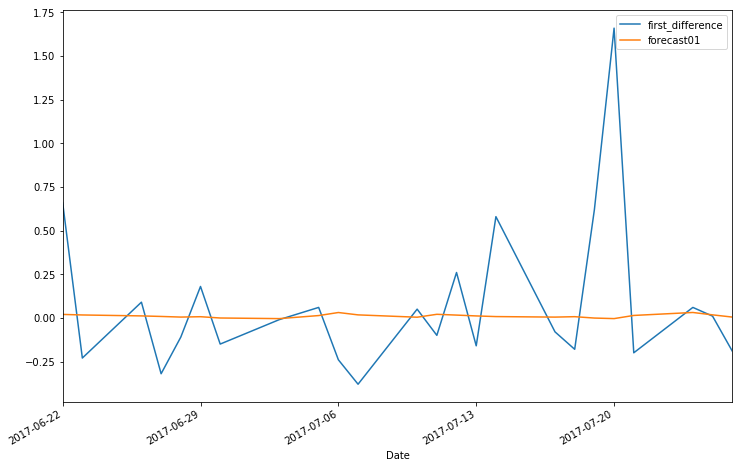

In [163]:
A['forecast01'] = resultsARIMA01.predict() 
A[['first_difference', 'forecast01']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

### Case5: p=1, q=1

In [171]:
modARIMA11 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(1,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
resultsARIMA11 = modARIMA11.fit()
print(resultsARIMA11.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   first_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -596.281
Date:                            Wed, 02 Aug 2017   AIC                           1200.562
Time:                                    09:37:16   BIC                           1229.126
Sample:                                07-28-1980   HQIC                          1210.264
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1020      0.005     19.627      0.000       0.092       0.112
ma.L1         -1.0000      0.076   

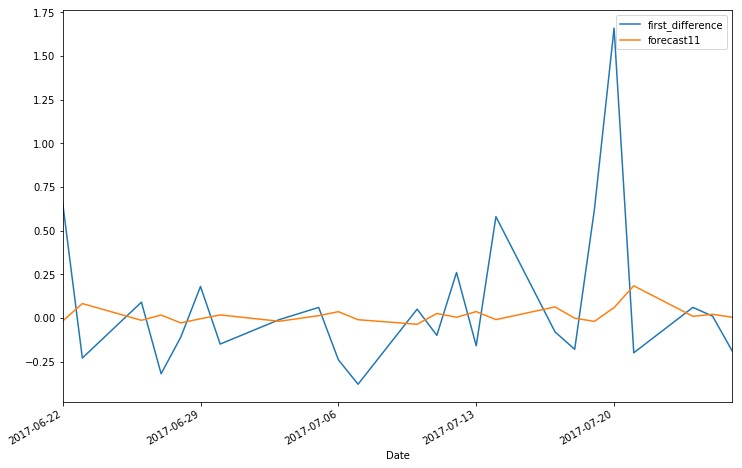

In [172]:
A['forecast11'] = resultsARIMA11.predict() 
A[['first_difference', 'forecast11']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

### Case6: p=18, q=1

In [174]:
modARIMA181 = sm.tsa.statespace.SARIMAX(A['first_difference'], trend='n', order=(18,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMA181 = modARIMA181.fit()
print(resultsARIMA181.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                    first_difference   No. Observations:                 9331
Model:             SARIMAX(18, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -564.591
Date:                             Wed, 02 Aug 2017   AIC                           1171.183
Time:                                     09:50:12   BIC                           1321.146
Sample:                                 07-28-1980   HQIC                          1222.120
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.005     19.650      0.000       0.097       0.118
ar.L2         -0.0516      

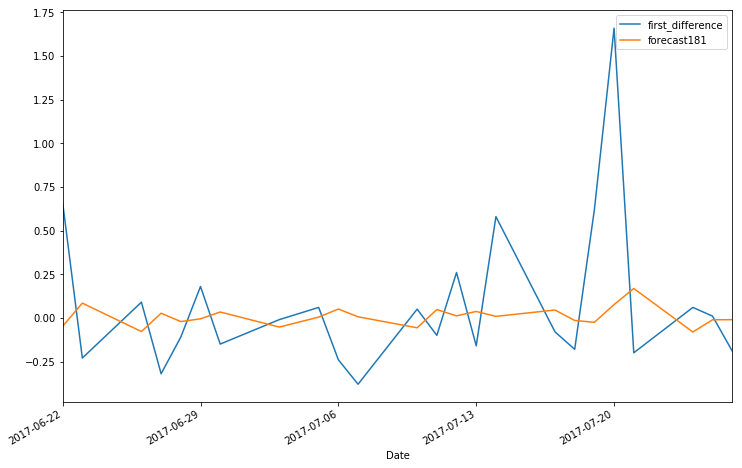

In [175]:
A['forecast181'] = resultsARIMA181.predict() 
A[['first_difference', 'forecast181']].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

# Note:

The output of our code suggests that SARIMAX(18, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 1171.183. We should therefore consider this to be optimal option out of all the ARIMA models with first difference we have considered.

We can now try to use the seasonal difference to obtaing the Optimum ARIMA model

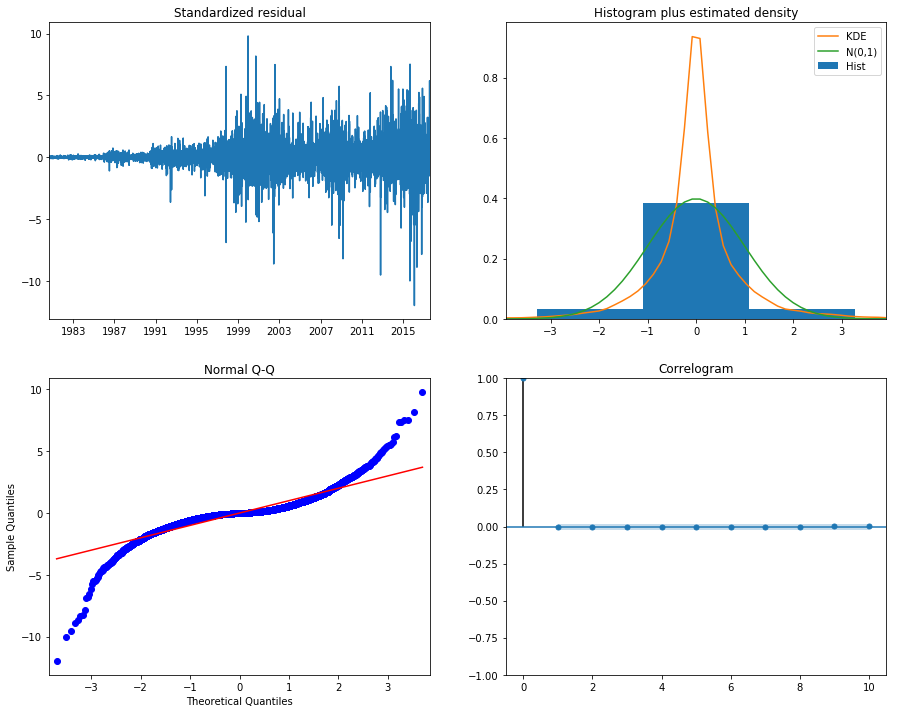

In [177]:
resultsARIMA181.plot_diagnostics(figsize=(15, 12))
plt.show()

## ARIMA: Seasonal Difference

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


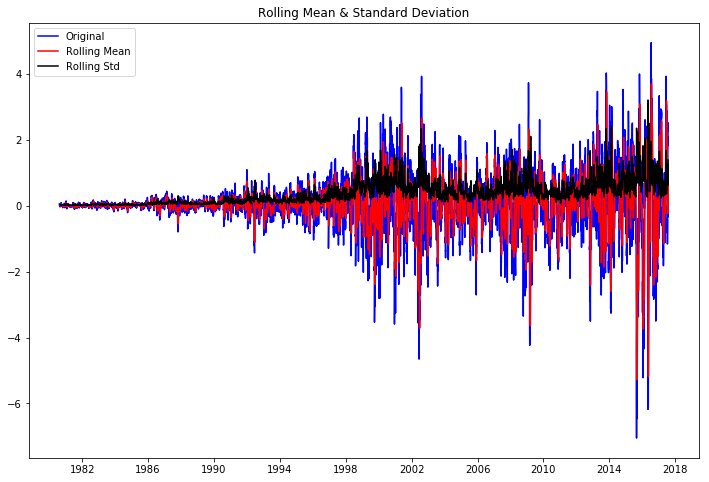

Results of Dickey-Fuller Test:
Test Statistic                -1.495437e+01
p-value                        1.266526e-27
#Lags Used                     3.800000e+01
Number of Observations Used    9.280000e+03
Critical Value (1%)           -3.431055e+00
Critical Value (5%)           -2.861852e+00
Critical Value (10%)          -2.566936e+00
dtype: float64


In [180]:
A['seasonal_difference'] = A.High - A.High.shift(12)  
test_stationarity(A.seasonal_difference.dropna(inplace=False))

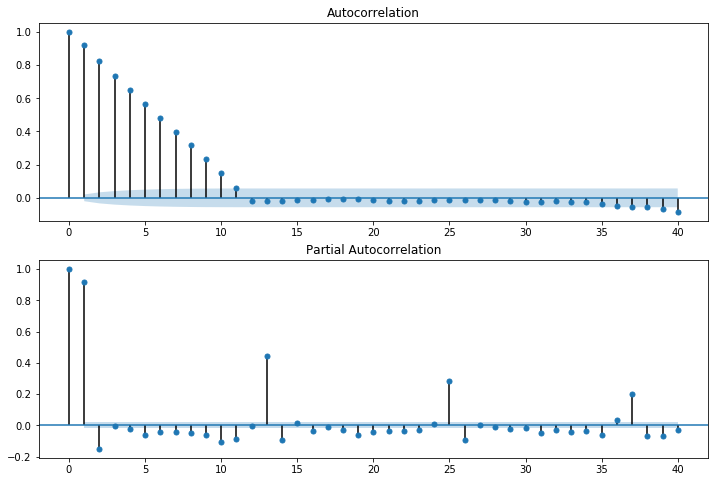

In [182]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(A['seasonal_difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(A['seasonal_difference'].iloc[13:], lags=40, ax=ax2)

From the above Autocorrelation Fuction Plot, we can deduce that p=0, p=1, p=2, p=3 p=4, q=0, q=1, q=13, q=25, q=37 are suitable lags.

###	Case1	:	p=0	,	q=0


In [191]:
modARIMAS00 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(0,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS00 = modARIMAS00.fit()
print(resultsARIMAS00.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3795.706
Date:                            Wed, 02 Aug 2017   AIC                           7595.412
Time:                                    15:27:17   BIC                           7609.694
Sample:                                07-28-1980   HQIC                          7600.263
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0000      3.475     -0.288      0.773      -7.810       5.810
sigma2         0.1313      0.456   

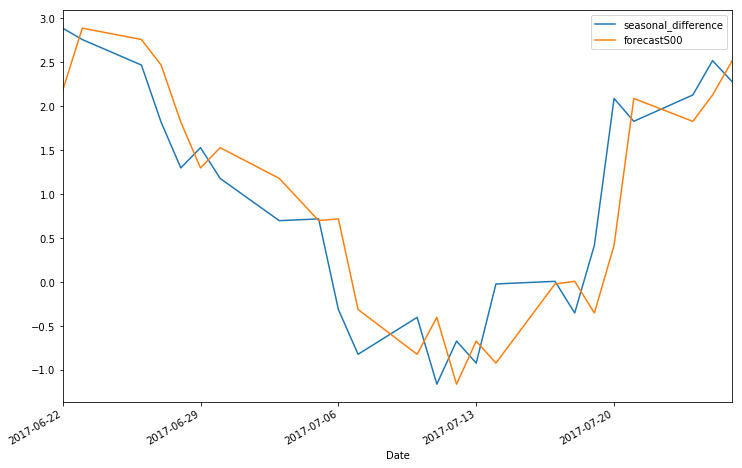

In [192]:
A['forecastS00'] = resultsARIMAS00.predict() 
A[['seasonal_difference', 'forecastS00']].ix[-24:].plot(figsize=(12, 8)) 


###	Case2	:	p=1	,	q=0



In [193]:
modARIMAS10 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(1,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS10 = modARIMAS10.fit()
print(resultsARIMAS10.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3744.510
Date:                            Wed, 02 Aug 2017   AIC                           7495.020
Time:                                    15:28:05   BIC                           7516.444
Sample:                                07-28-1980   HQIC                          7502.297
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1046      0.006     17.837      0.000       0.093       0.116
ma.S.L12      -1.0000      3.406   

###	Case3	:	p=2	,	q=0


In [194]:
modARIMAS20 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(2,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS20 = modARIMAS20.fit()
print(resultsARIMAS20.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(2, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3733.381
Date:                            Wed, 02 Aug 2017   AIC                           7474.763
Time:                                    15:28:53   BIC                           7503.327
Sample:                                07-28-1980   HQIC                          7484.465
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1096      0.006     18.565      0.000       0.098       0.121
ar.L2         -0.0489      0.006   

###	Case4	:	p=3	,	q=0


In [195]:
modARIMAS30 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(3,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS30 = modARIMAS30.fit()
print(resultsARIMAS30.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(3, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3730.073
Date:                            Wed, 02 Aug 2017   AIC                           7470.147
Time:                                    15:30:16   BIC                           7505.852
Sample:                                07-28-1980   HQIC                          7482.275
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1084      0.006     18.316      0.000       0.097       0.120
ar.L2         -0.0460      0.006   

###	Case5	:	p=4	,	q=0


In [196]:
modARIMAS40 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(4,1,0), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS40 = modARIMAS40.fit()
print(resultsARIMAS40.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(4, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3729.551
Date:                            Wed, 02 Aug 2017   AIC                           7471.103
Time:                                    15:31:25   BIC                           7513.949
Sample:                                07-28-1980   HQIC                          7485.656
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1085      0.006     18.327      0.000       0.097       0.120
ar.L2         -0.0454      0.006   

###	Case6	:	p=0	,	q=1


In [197]:
modARIMAS01 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS01 = modARIMAS01.fit()
print(resultsARIMAS01.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3739.874
Date:                            Wed, 02 Aug 2017   AIC                           7485.749
Time:                                    15:32:28   BIC                           7507.172
Sample:                                07-28-1980   HQIC                          7493.025
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1130      0.006     19.346      0.000       0.102       0.124
ma.S.L12      -1.0000      5.807   

###	Case7	:	p=1	,	q=1


In [198]:
modARIMAS11 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(1,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS11 = modARIMAS11.fit()
print(resultsARIMAS11.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3737.493
Date:                            Wed, 02 Aug 2017   AIC                           7482.986
Time:                                    15:33:43   BIC                           7511.551
Sample:                                07-28-1980   HQIC                          7492.688
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1514      0.053     -2.849      0.004      -0.255      -0.047
ma.L1          0.2620      0.052   

###	Case8	:	p=2	,	q=1


In [199]:
modARIMAS21 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(2,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS21 = modARIMAS21.fit()
print(resultsARIMAS21.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3511.699
Date:                            Wed, 02 Aug 2017   AIC                           7033.399
Time:                                    15:36:14   BIC                           7069.104
Sample:                                07-28-1980   HQIC                          7045.526
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0593      0.006    180.321      0.000       1.048       1.071
ar.L2         -0.1505      0.006   

###	Case9	:	p=3	,	q=1


In [200]:
modARIMAS31 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(3,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS31 = modARIMAS31.fit()
print(resultsARIMAS31.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3729.233
Date:                            Wed, 02 Aug 2017   AIC                           7470.467
Time:                                    15:38:19   BIC                           7513.314
Sample:                                07-28-1980   HQIC                          7485.020
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2257      0.203     -1.114      0.265      -0.623       0.171
ar.L2         -0.0093      0.023   

###	Case10	:	p=4	,	q=1


In [201]:
modARIMAS41 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(4,1,1), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS41 = modARIMAS41.fit()
print(resultsARIMAS41.summary())

                                 Statespace Model Results                                 
Dep. Variable:                seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3729.259
Date:                            Wed, 02 Aug 2017   AIC                           7472.518
Time:                                    15:39:35   BIC                           7522.505
Sample:                                07-28-1980   HQIC                          7489.497
                                     - 07-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0531      0.636      0.084      0.933      -1.192       1.299
ar.L2         -0.0393      0.070   

###	Case11	:	p=0	,	q=13


In [202]:
modARIMAS013 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(0,1,13), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS013 = modARIMAS013.fit()
print(resultsARIMAS013.summary())

                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 13)x(0, 1, 1, 12)   Log Likelihood                -667.187
Date:                             Wed, 02 Aug 2017   AIC                           1364.375
Time:                                     15:50:13   BIC                           1471.491
Sample:                                 07-28-1980   HQIC                          1400.758
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1104      4.220      0.026      0.979      -8.162       8.382
ma.L2         -0.0028     2

###	Case12	:	p=1	,	q=13


In [203]:
modARIMAS113 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(1,1,13), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS113 = modARIMAS113.fit()
print(resultsARIMAS113.summary())

                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 13)x(0, 1, 1, 12)   Log Likelihood                -663.672
Date:                             Wed, 02 Aug 2017   AIC                           1359.344
Time:                                     16:06:02   BIC                           1473.601
Sample:                                 07-28-1980   HQIC                          1398.153
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1955      0.053     -3.656      0.000      -0.300      -0.091
ma.L1          0.3036      

###	Case13	:	p=2	,	q=13


In [204]:
modARIMAS213 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(2,1,13), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS213 = modARIMAS213.fit()
print(resultsARIMAS213.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(2, 1, 13)x(0, 1, 1, 12)   Log Likelihood                -660.207
Date:                             Wed, 02 Aug 2017   AIC                           1354.414
Time:                                     16:22:32   BIC                           1475.813
Sample:                                 07-28-1980   HQIC                          1395.649
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2173      0.116      1.869      0.062      -0.011       0.445
ar.L2         -0.0636      

###	Case14	:	p=3	,	q=13


In [205]:
modARIMAS313 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(3,1,13), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS313 = modARIMAS313.fit()
print(resultsARIMAS313.summary())

                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(3, 1, 13)x(0, 1, 1, 12)   Log Likelihood                -659.924
Date:                             Wed, 02 Aug 2017   AIC                           1355.849
Time:                                     16:35:53   BIC                           1484.388
Sample:                                 07-28-1980   HQIC                          1399.509
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1036      0.381      0.272      0.786      -0.643       0.850
ar.L2         -0.0486      

###	Case15	:	p=4	,	q=13


In [206]:
modARIMAS413 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(4,1,13), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS413 = modARIMAS413.fit()
print(resultsARIMAS413.summary())

                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(4, 1, 13)x(0, 1, 1, 12)   Log Likelihood                -659.877
Date:                             Wed, 02 Aug 2017   AIC                           1357.754
Time:                                     16:51:51   BIC                           1493.434
Sample:                                 07-28-1980   HQIC                          1403.839
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1073      3.086      0.035      0.972      -5.942       6.157
ar.L2         -0.0492      

###	Case16	:	p=0	,	q=25


In [207]:
modARIMAS025 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(0,1,25), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS025 = modARIMAS025.fit()
print(resultsARIMAS025.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(0, 1, 25)x(0, 1, 1, 12)   Log Likelihood                -655.380
Date:                             Wed, 02 Aug 2017   AIC                           1364.759
Time:                                     17:40:12   BIC                           1557.569
Sample:                                 07-28-1980   HQIC                          1430.249
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1157      0.154      0.752      0.452      -0.186       0.418
ma.L2         -0.0287      

###	Case17	:	p=1	,	q=25


In [ ]:
modARIMAS125 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(1,1,25), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS125 = modARIMAS125.fit()
print(resultsARIMAS125.summary())

C:\Users\niharika\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                 seasonal_difference   No. Observations:                 9331
Model:             SARIMAX(1, 1, 25)x(0, 1, 1, 12)   Log Likelihood                -660.898
Date:                             Wed, 02 Aug 2017   AIC                           1377.797
Time:                                     18:33:08   BIC                           1577.748
Sample:                                 07-28-1980   HQIC                          1445.713
                                      - 07-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0040      0.527     -0.008      0.994      -1.037       1.030
ma.L1          0.1082      

###	Case18	:	p=2	,	q=25


In [ ]:
modARIMAS225 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(2,1,25), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS225 = modARIMAS225.fit()
print(resultsARIMAS225.summary())

###	Case19	:	p=3	,	q=25


In [ ]:
modARIMAS325 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(3,1,25), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS325 = modARIMAS325.fit()
print(resultsARIMAS325.summary())

###	Case20	:	p=4	,	q=25


In [ ]:
modARIMAS425 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(4,1,25), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS425 = modARIMAS425.fit()
print(resultsARIMAS425.summary())

###	Case21	:	p=0	,	q=37


In [ ]:
modARIMAS037 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(0,1,37), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS037 = modARIMAS037.fit()
print(resultsARIMAS3037.summary())

###	Case22	:	p=1	,	q=37


In [ ]:
modARIMAS137 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(1,1,37), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS137 = modARIMAS137.fit()
print(resultsARIMAS137.summary())

###	Case23	:	p=2	,	q=37


In [ ]:
modARIMAS237 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(2,1,37), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS237 = modARIMAS237.fit()
print(resultsARIMAS237.summary())

###	Case24	:	p=3	,	q=37


In [ ]:
modARIMAS337 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(3,1,37), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS337 = modARIMAS337.fit()
print(resultsARIMAS337.summary())

###	Case25	:	p=4	,	q=37

In [ ]:
modARIMAS437 = sm.tsa.statespace.SARIMAX(A['seasonal_difference'], trend='n', order=(4,1,37), seasonal_order=(0,1,1,12),
                                enforce_invertibility=False, enforce_stationarity=False)
resultsARIMAS437 = modARIMAS437.fit()
print(resultsARIMAS437.summary())

# Choice of GARCH

The process to fit a GARCH model is as follows:

1. Iterate through combinations of ARIMA(p, d, q) models to best fit our time series. 
1. Pick the GARCH model orders according to the ARIMA model with lowest AIC.
1. Fit the GARCH(p, q) model to our time series.
1. Examine the model residuals and squared residuals for autocorrelation